# Visualise Data Distribution of Different Sampling Methods

# logarithmic grid sampling using np.logspace

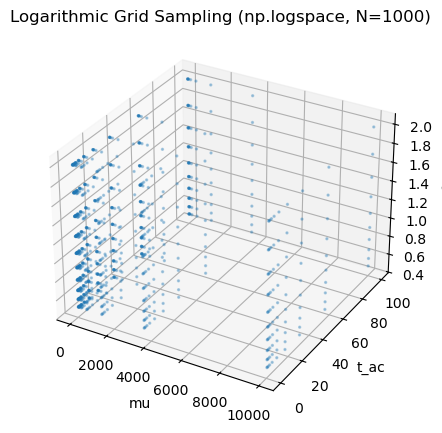

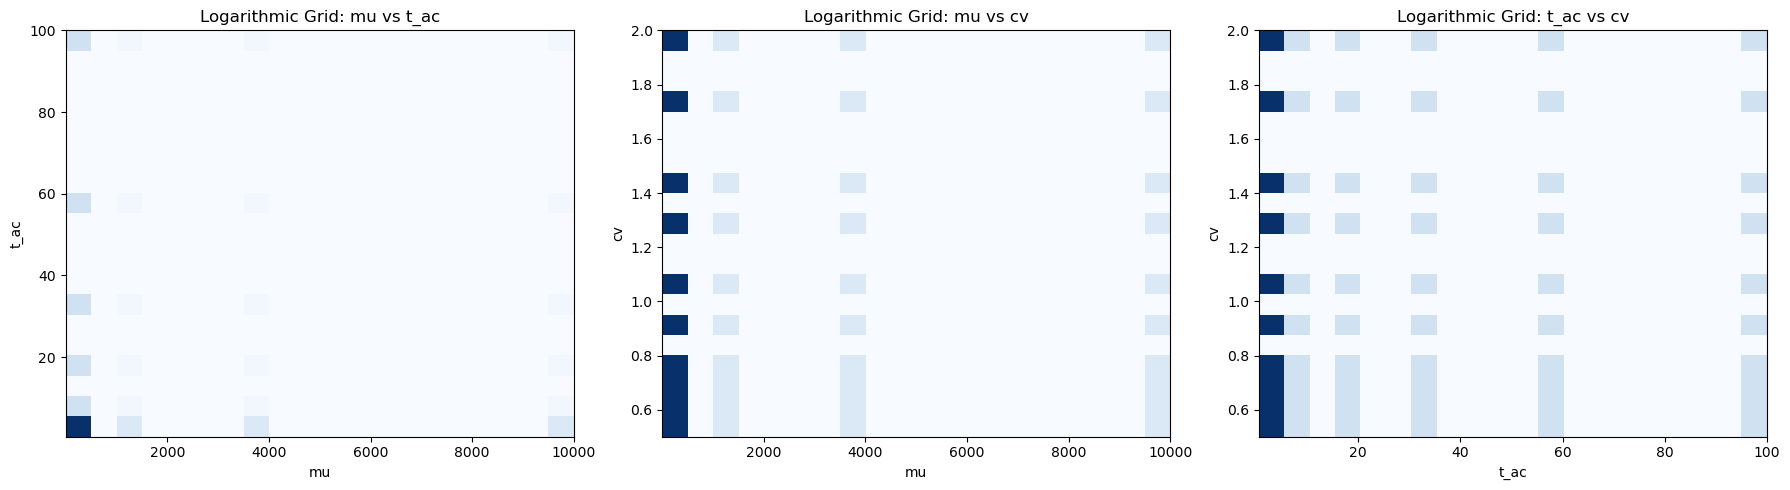

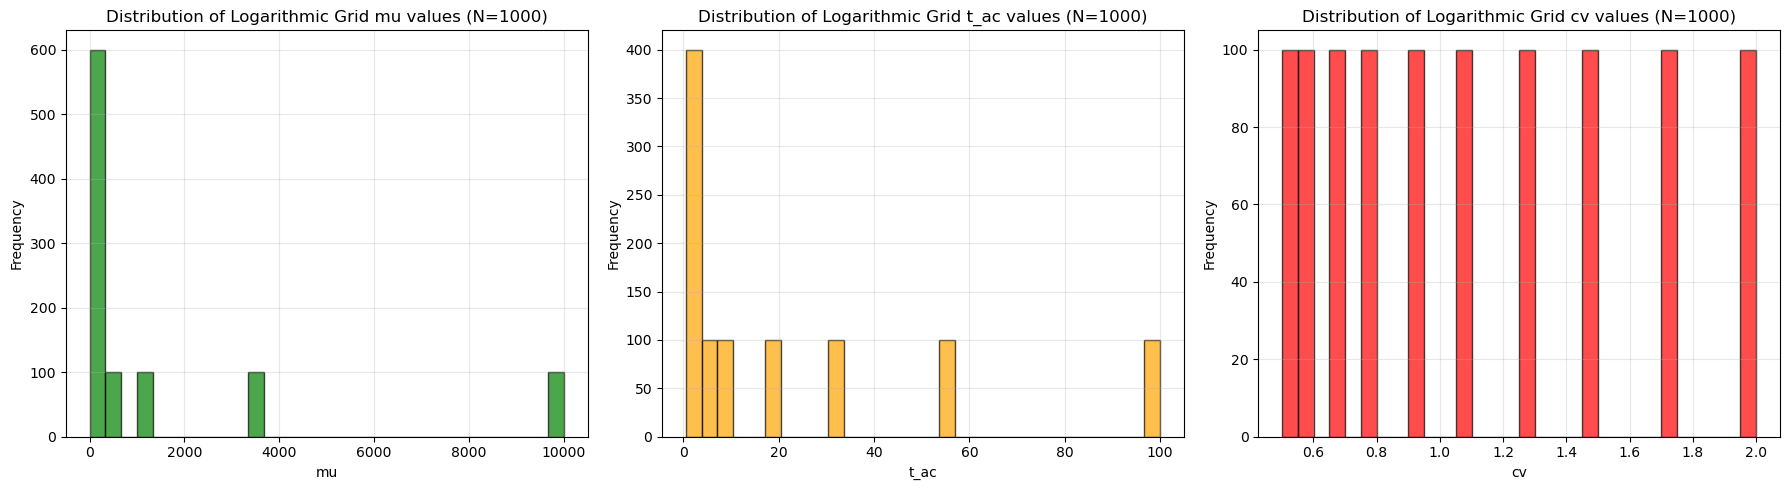

In [17]:
# Logarithmic Grid Sampling using np.logspace
mu_target = np.logspace(0, 4, 10)  # 1 to 10,000 (log scale)
t_ac_target = np.logspace(-0.3, 2, 10)  # ~0.5 to 100 (log scale)
cv_target = np.logspace(-0.3, np.log10(2), 10)  # ~0.5 to 2.0 (log scale)

# Create all combinations using meshgrid (logarithmic grid)
targets = np.array(np.meshgrid(mu_target, t_ac_target, cv_target)).T.reshape(-1, 3)
N = len(targets)  # Total number of grid points = 10×10×10 = 1000

# 3D scatter plot of logarithmic grid
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title(f'Logarithmic Grid Sampling (np.logspace, N={N})')
plt.show()

# 2D histograms for pairwise parameter combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist2d(targets[:, 0], targets[:, 1], bins=20, cmap='Blues')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('t_ac')
axes[0].set_title('Logarithmic Grid: mu vs t_ac')

axes[1].hist2d(targets[:, 0], targets[:, 2], bins=20, cmap='Blues')
axes[1].set_xlabel('mu')
axes[1].set_ylabel('cv')
axes[1].set_title('Logarithmic Grid: mu vs cv')

axes[2].hist2d(targets[:, 1], targets[:, 2], bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac')
axes[2].set_ylabel('cv')
axes[2].set_title('Logarithmic Grid: t_ac vs cv')

plt.tight_layout()
plt.show()

# Distribution plots for logarithmic grid parameters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(targets[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Logarithmic Grid mu values (N=1000)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(targets[:, 1], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('t_ac')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Logarithmic Grid t_ac values (N=1000)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(targets[:, 2], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('cv')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Logarithmic Grid cv values (N=1000)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Uniform Grid Sampling using np.linspace

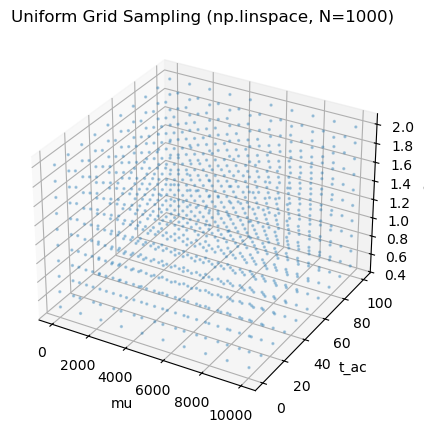

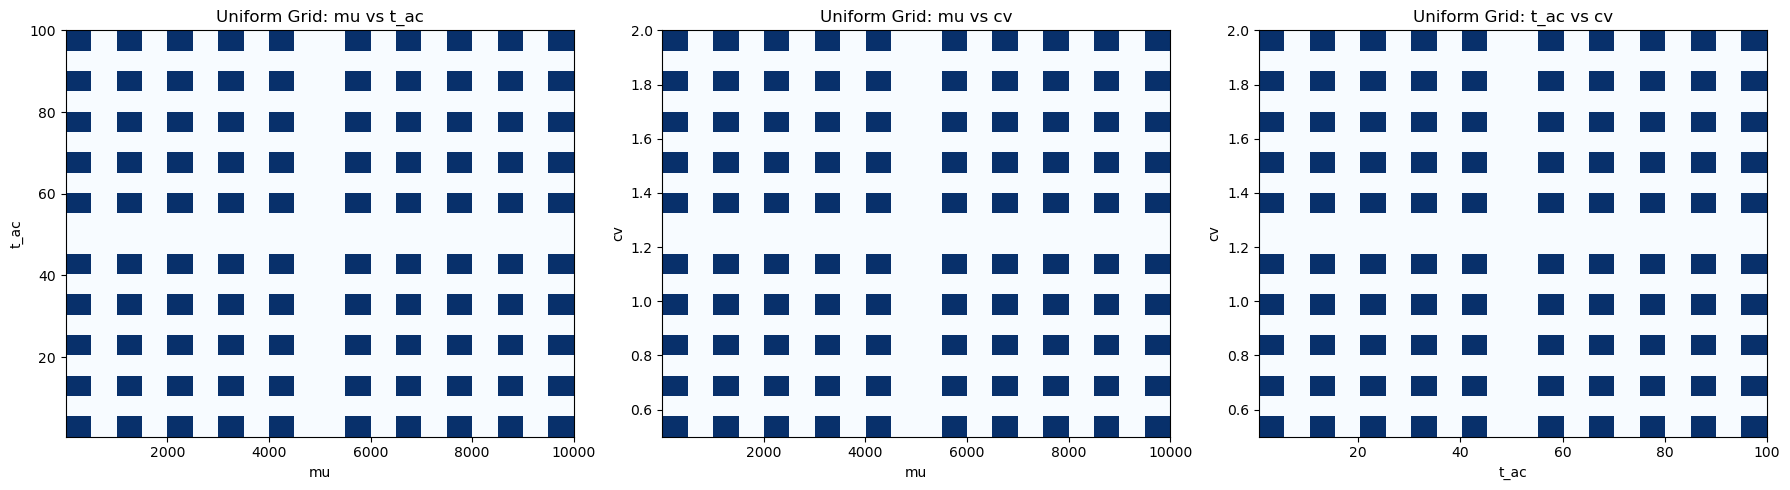

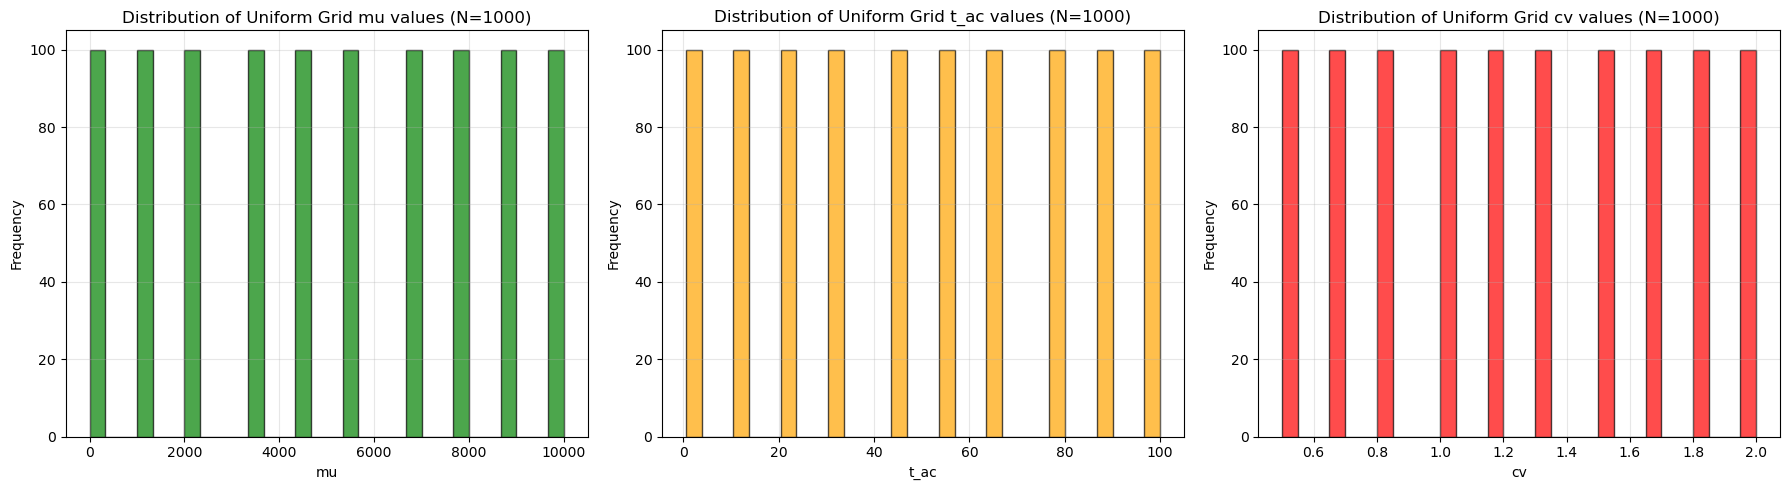

In [18]:
# Uniform Grid Sampling using np.linspace
mu_target = np.linspace(1, 10000, 10)  # 1 to 10,000 (uniform scale)
t_ac_target = np.linspace(0.5, 100, 10)  # 0.5 to 100 (uniform scale)
cv_target = np.linspace(0.5, 2, 10)  # 0.5 to 2.0 (uniform scale)

# Create all combinations using meshgrid (uniform grid)
targets = np.array(np.meshgrid(mu_target, t_ac_target, cv_target)).T.reshape(-1, 3)
N = len(targets)  # Total number of grid points = 10×10×10 = 1000

# 3D scatter plot of uniform grid
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title(f'Uniform Grid Sampling (np.linspace, N={N})')
plt.show()

# 2D histograms for pairwise parameter combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist2d(targets[:, 0], targets[:, 1], bins=20, cmap='Blues')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('t_ac')
axes[0].set_title('Uniform Grid: mu vs t_ac')

axes[1].hist2d(targets[:, 0], targets[:, 2], bins=20, cmap='Blues')
axes[1].set_xlabel('mu')
axes[1].set_ylabel('cv')
axes[1].set_title('Uniform Grid: mu vs cv')

axes[2].hist2d(targets[:, 1], targets[:, 2], bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac')
axes[2].set_ylabel('cv')
axes[2].set_title('Uniform Grid: t_ac vs cv')

plt.tight_layout()
plt.show()

# Distribution plots for uniform grid parameters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(targets[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Uniform Grid mu values (N=1000)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(targets[:, 1], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('t_ac')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Uniform Grid t_ac values (N=1000)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(targets[:, 2], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('cv')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Uniform Grid cv values (N=1000)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Solbol-sampled parameter space
This section verifies that Sobol sampling covers the parameter space evenly.

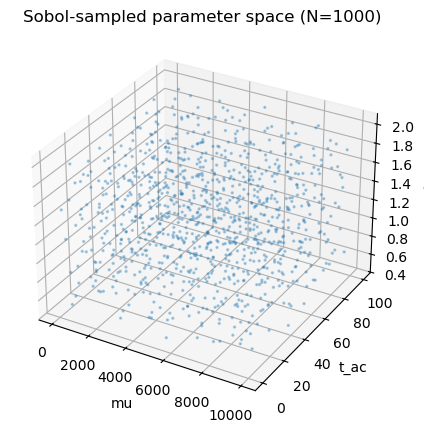

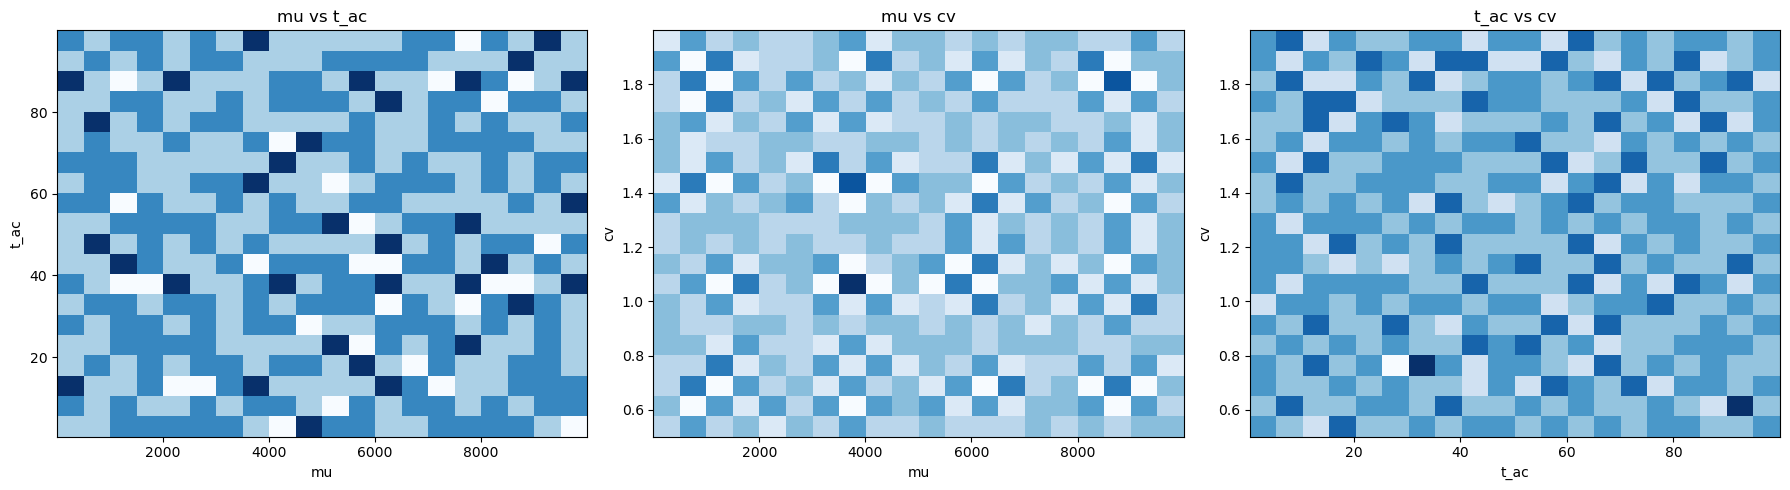

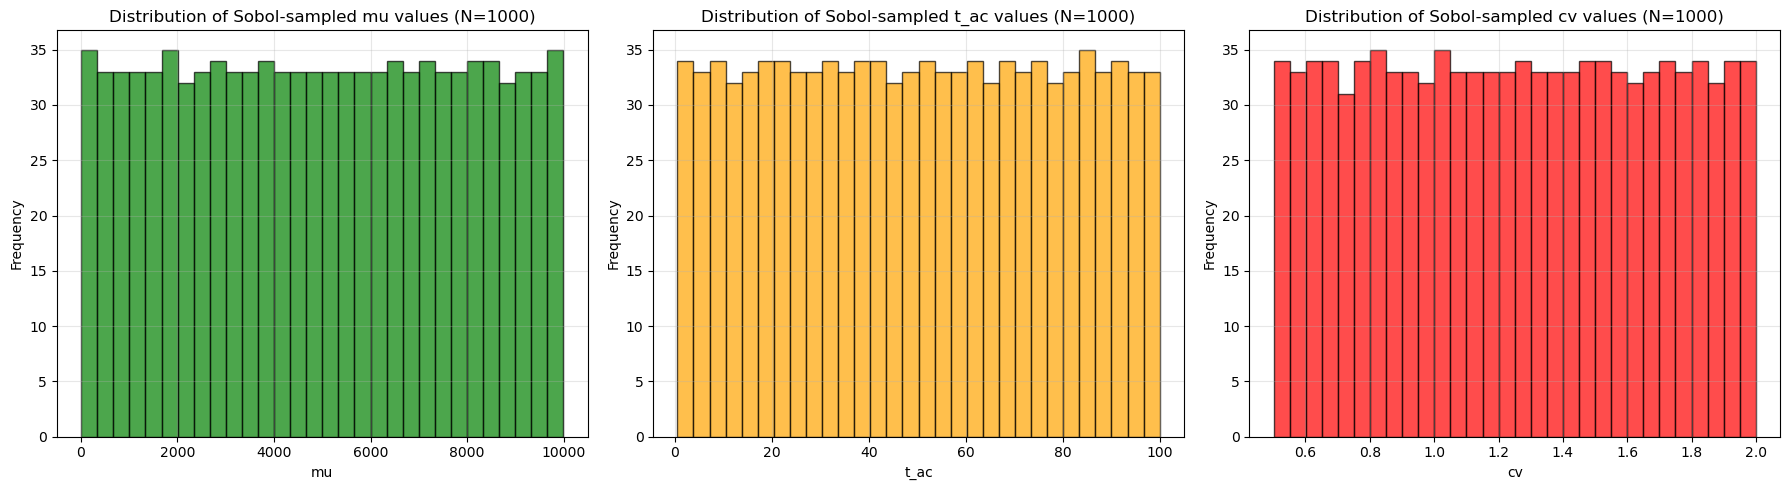

In [10]:
from scipy.stats import qmc
# replace the 10×10×10 grid with N Sobol samples
N = 1000  # or any budget you prefer
sobol = qmc.Sobol(d=3, scramble=True, seed=42)
U = sobol.random_base2(int(np.ceil(np.log2(N))))[:N]  # N points in [0,1)^3

mu_target  = qmc.scale(U[:,0:1], [1], [10_000])      # map to [1, 10000]
tacs_target = qmc.scale(U[:,1:2], [0.5], [100])      # map to [0.5, 100]
cvs_target  = qmc.scale(U[:,2:3], [0.5], [2.0])      # map to [0.5, 2.0]

# Flatten the arrays since qmc.scale returns 2D arrays
mu_target = mu_target.flatten()
tacs_target = tacs_target.flatten()
cvs_target = cvs_target.flatten()

# plot for mu_target, tacs_target and cvs_target here
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mu_target, tacs_target, cvs_target, s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title(f'Sobol-sampled parameter space (N={N})')
plt.show()

fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].hist2d(mu_target, tacs_target, bins=20, cmap='Blues')
axes[0].set_xlabel('mu'); axes[0].set_ylabel('t_ac'); axes[0].set_title('mu vs t_ac')
axes[1].hist2d(mu_target, cvs_target, bins=20, cmap='Blues')
axes[1].set_xlabel('mu'); axes[1].set_ylabel('cv'); axes[1].set_title('mu vs cv')
axes[2].hist2d(tacs_target, cvs_target, bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac'); axes[2].set_ylabel('cv'); axes[2].set_title('t_ac vs cv')
plt.tight_layout()
plt.show()

# Distribution plots for Sobol-sampled parameters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(mu_target, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sobol-sampled mu values (N=1000)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(tacs_target, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('t_ac')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sobol-sampled t_ac values (N=1000)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(cvs_target, bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('cv')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Sobol-sampled cv values (N=1000)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()